In [2]:
import bpy
from IPython.display import display, Image

def fresh_scene():
    # Deselect all objects
    bpy.ops.object.select_all(action='DESELECT')
    # Select all objects except lights and cameras
    for obj in bpy.context.scene.objects:
        if obj.type != 'LIGHT' and obj.type != 'CAMERA':
            obj.select_set(True)
        else:
            obj.select_set(False)
    bpy.ops.object.delete()

def render_result():
    bpy.ops.render.render()
    bpy.data.images['Render Result'].save_render(filepath="img.png")
    display(Image(filename="img.png"))

bpy.context.scene.render.resolution_x = 500
bpy.context.scene.render.resolution_y = 200

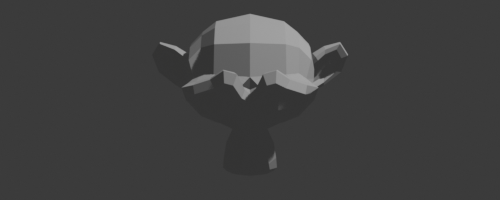

In [27]:
fresh_scene()

bpy.ops.mesh.primitive_monkey_add(size=1, location=(0, 0, 0))

camera_object = bpy.data.objects["Camera"]
camera_object.location = (0, -4, 2.5)
camera_object.rotation_euler = (1, 0, 0)
render_result()

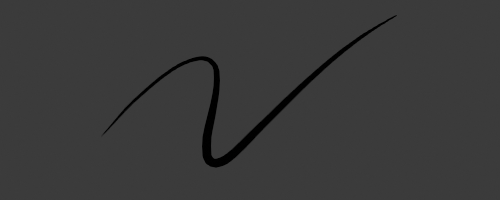

In [31]:
fresh_scene()

# Add a default Grease Pencil object (with a stroke)
bpy.ops.object.gpencil_add(location=(0, 0, 0), type='STROKE')

# Set camera location directly in front of the Grease Pencil object
camera_object = bpy.data.objects["Camera"]
camera_object.location = (0, -6, 0)  # Camera positioned on the Y-axis directly in front
camera_object.rotation_euler = (1.57, 0, 0)  # Point camera directly at the Grease Pencil object

# Render the result
render_result()

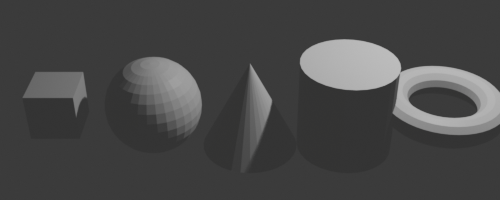

In [28]:
fresh_scene()

# Add objects at specific positions to form a grid
bpy.ops.mesh.primitive_cube_add(size=1, location=(-4, 0, 0)) 
bpy.ops.mesh.primitive_uv_sphere_add(radius=1, location=(-2, 0, 0)) 
bpy.ops.mesh.primitive_cone_add(radius1=1, depth=2, location=(0, 0, 0))  
bpy.ops.mesh.primitive_cylinder_add(radius=1, depth=2, location=(2, 0, 0)) 
bpy.ops.mesh.primitive_torus_add(major_radius=1, minor_radius=0.3, location=(4,0, 0))

# Set camera location
camera_object = bpy.data.objects["Camera"]

camera_object.location = (0, -12, 8)

# Point camera towards the center of the grid
camera_object.rotation_euler = (0.99,0,0)
render_result()

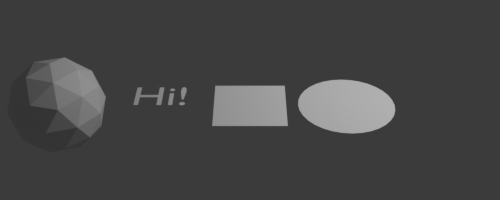

In [36]:
fresh_scene()

# Add additional shapes at new locations, with Y=0 for all objects
bpy.ops.mesh.primitive_ico_sphere_add(radius=1, location=(-4, 0, 0)) 

bpy.ops.object.text_add(location=(-2.5, 0, 0))
bpy.context.object.data.body = "Hi!"

bpy.ops.mesh.primitive_plane_add(size=1.5, location=(0, 0, 0))  

bpy.ops.mesh.primitive_circle_add(radius=1, location=(2, 0, 0), fill_type='NGON')
# Replace the last torus with an Empty object, Y=0

bpy.ops.object.empty_add(type='PLAIN_AXES', location=(4, 0, 0)) # (This is not shown in the image, but it is there :) )

# Set camera location
camera_object = bpy.data.objects["Camera"]
camera_object.location = (0, -12, 8)
# Point camera towards the center of the grid
camera_object.rotation_euler = (0.99, 0, 0)

render_result()